# <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

Sendy has hired you to help predict the estimated time of delivery of orders, from the point of driver pickup to the point of arrival at the final destination. Build a model that predicts an accurate delivery time, from picking up a package arriving at the final destination. An accurate arrival time prediction will help all business to improve their logistics and communicate the accurate time their time to their customers. You will be required to perform various feature engineering techniques while preparing your data for further analysis.


### b) Defining the Metric for Success

The Root Mean Squared Error (RMSE) and the R-squared (R2) scores will be the metrics by which we evaluate the success of our model.

### c) Understanding the Context 

Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to 320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy is a business-to-business platform established in 2014, to enable businesses of all types and sizes to transport goods more efficiently across East Africa. The company is headquartered in Kenya with a team of more than 100 staff, focused on building practical solutions for Africa’s dynamic transportation needs, from developing apps and web solutions to providing dedicated support for goods on the move.

### d) Recording the Experimental Design

* Defining the Research Question
* Data Importation
* Data Exploration
* Data Cleaning
* Data Analysis (Univariate and Bivariate)
* Data Preparation
* Data Modeling
* Model Evaluation
* Challenging your Solution
* Recommendations / Conclusion 

### e) Data Relevance

Since the dataset provided is a subset of over 20,000 orders and only includes direct orders (i.e. Sendy “express” orders) with bikes in Nairobi, it is relevant to answering the research question.

# <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [2]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.columns', None)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [3]:
# loading and previewing dataset
df = pd.read_csv('sendy_logistics.csv')
df.sample(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
10971,Order_No_22856,User_Id_2360,Bike,1,Business,20,4,11:55:00 AM,20,4,11:55:40 AM,20,4,11:59:37 AM,20,4,12:10:56 PM,20,4,12:17:42 PM,4,24.3,NaN,-1.270886,36.813577,-1.255189,36.782203,Rider_Id_620,406
6230,Order_No_18054,User_Id_1271,Bike,3,Business,5,2,3:30:30 PM,5,2,3:56:08 PM,5,2,4:17:35 PM,5,2,4:36:11 PM,5,2,4:48:55 PM,9,25.1,NaN,-1.324488,36.897792,-1.332311,36.869262,Rider_Id_377,764
13824,Order_No_18721,User_Id_1352,Bike,3,Personal,5,2,9:37:19 AM,5,2,9:37:41 AM,5,2,9:46:18 AM,5,2,9:55:51 AM,5,2,10:33:03 AM,19,17.9,4.1,-1.265531,36.828148,-1.345962,36.907393,Rider_Id_813,2232


In [4]:
# checking dataset shape
df.shape

(21201, 29)

In [5]:
# checking data types
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [6]:
# convert the time variables to their proper data type
from datetime import datetime

time_variables =['Arrival at Pickup - Time', 'Placement - Time', 'Confirmation - Time',
                 'Pickup - Time', 'Arrival at Destination - Time']

for var in time_variables:
    df[var] = df[var].apply(lambda x: datetime.strptime(x, '%I:%M:%S %p')).dt.time
     
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16,12,5,11:23:21,12,5,11:40:22,12,5,11:44:09,12,5,12:17:22,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25,30,2,12:42:44,30,2,12:49:34,30,2,12:53:03,30,2,13:00:38,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,09:25:34,15,5,09:26:05,15,5,09:37:56,15,5,09:43:06,15,5,10:05:27,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,09:55:18,13,1,09:56:18,13,1,10:03:53,13,1,10:05:23,13,1,10:25:37,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [7]:
# dropping duplicates, if any
df.drop_duplicates(inplace = True)
df.shape

(21201, 29)

In [8]:
# checking for missing data
df.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [9]:
# get percentage of missing values
temp_missing = (df['Temperature'].isna().sum() / df.shape[0]) * 100
precip_missing = (df['Precipitation in millimeters'].isna().sum() / df.shape[0]) * 100

print(round(temp_missing, 2))
print(round(precip_missing, 2))

20.59
97.4


We will drop the Precipitation variable and then impute the Temperature variable with its mean.

In [10]:
# dropping the column with too many missing values
df = df.drop(columns = ['Precipitation in millimeters'])

# imputing the column with a reasonable amount of missing values
df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())

# confirming we have taken care of all missing values
df.isna().sum()

Order No                                     0
User Id                                      0
Vehicle Type                                 0
Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Placement - Time                             0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Confirmation - Time                          0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Arrival at Pickup - Time                     0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Pickup - Time                                0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Arrival at Destination - Time                0
Distance (KM)                                0
Temperature  

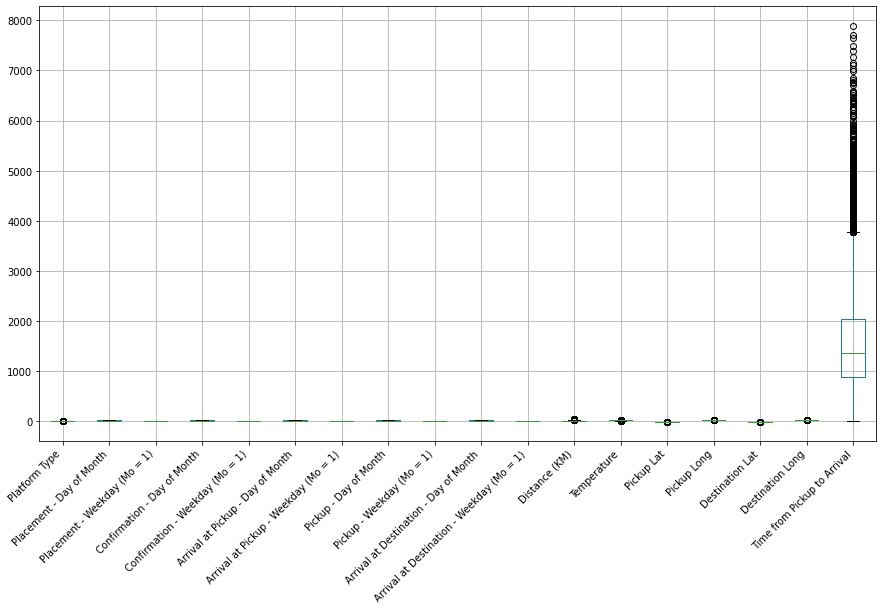

In [11]:
# visualizing the distribution of outliers
plt.figure(figsize = (15, 8))
df.boxplot(rot = 45)
plt.xticks(ha = 'right')
plt.show()

In [12]:
# getting the records with outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

outliers_df = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
print(outliers_df.shape)
outliers_df.sample(3)

(6471, 28)


,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
17400,Order_No_12889,User_Id_3434,Bike,3,Business,17,5,10:34:28,17,5,10:35:18,17,5,11:11:26,17,5,11:19:19,17,5,12:22:24,11,23.258889,-1.305314,36.860585,-1.241732,36.888628,Rider_Id_668,3785
2503,Order_No_6272,User_Id_1029,Bike,2,Personal,18,1,19:59:10,18,1,20:02:35,18,1,20:12:39,18,1,20:20:25,18,1,20:39:01,9,23.258889,-1.287206,36.780274,-1.258676,36.738681,Rider_Id_956,1116
19929,Order_No_13613,User_Id_3507,Bike,3,Personal,23,1,10:04:12,23,1,10:04:30,23,1,10:22:39,23,1,10:28:37,23,1,10:58:35,15,14.400000,-1.294463,36.752274,-1.326643,36.832018,Rider_Id_465,1798


In [13]:
# calculating percentage of outliers
round((outliers_df.shape[0] / df.shape[0]) * 100, 2)

30.52

In [14]:
# removing the records with the outliers
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis = 1)]
df.shape

(14730, 28)

In [15]:
# get the unique value of each variable to ensure there are no anomalies
cols = df.columns.to_list()

for col in cols:
    print("Variable:", col)
    print("Number of unique variables:", df[col].nunique())
    print(df[col].unique())
    print()

Variable: Order No
Number of unique variables: 14730
['Order_No_4211' 'Order_No_1899' 'Order_No_9336' ... 'Order_No_8834'
 'Order_No_22892' 'Order_No_9836']

Variable: User Id
Number of unique variables: 1229
['User_Id_633' 'User_Id_265' 'User_Id_1402' ... 'User_Id_3036'
 'User_Id_1922' 'User_Id_2001']

Variable: Vehicle Type
Number of unique variables: 1
['Bike']

Variable: Platform Type
Number of unique variables: 1
[3]

Variable: Personal or Business
Number of unique variables: 2
['Business' 'Personal']

Variable: Placement - Day of Month
Number of unique variables: 31
[ 9 30 15 14 11 23  2 19 12  3 28 17 22 13  8 24 26 18  7 21 27  5  1  4
 16  6 25 29 10 20 31]

Variable: Placement - Weekday (Mo = 1)
Number of unique variables: 7
[5 2 1 3 4 6 7]

Variable: Placement - Time
Number of unique variables: 11846
[datetime.time(9, 35, 46) datetime.time(12, 39, 25)
 datetime.time(9, 25, 34) ... datetime.time(17, 13, 44)
 datetime.time(12, 41, 17) datetime.time(13, 8, 34)]

Variable: Confi

Variables 'Vehicle Type' and 'Platform Type' have only 1 unique value each. We'll drop both columns.

In [16]:
df.drop(columns = ['Vehicle Type', 'Platform Type'], inplace = True)

# <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 Univariate Analysis

In [17]:
# selecting the columns that are numerical variables
num_var = df.select_dtypes(include = ['int64', 'float64']).columns.to_list()

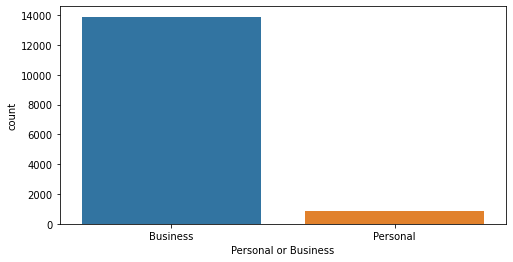

In [18]:
# plotting the distribution of personal or Business
plt.figure(figsize = (8, 4))
bar_plot = sns.countplot(df['Personal or Business'])
plt.show()

Majority of the clients type is Businesses rather than Personal. 

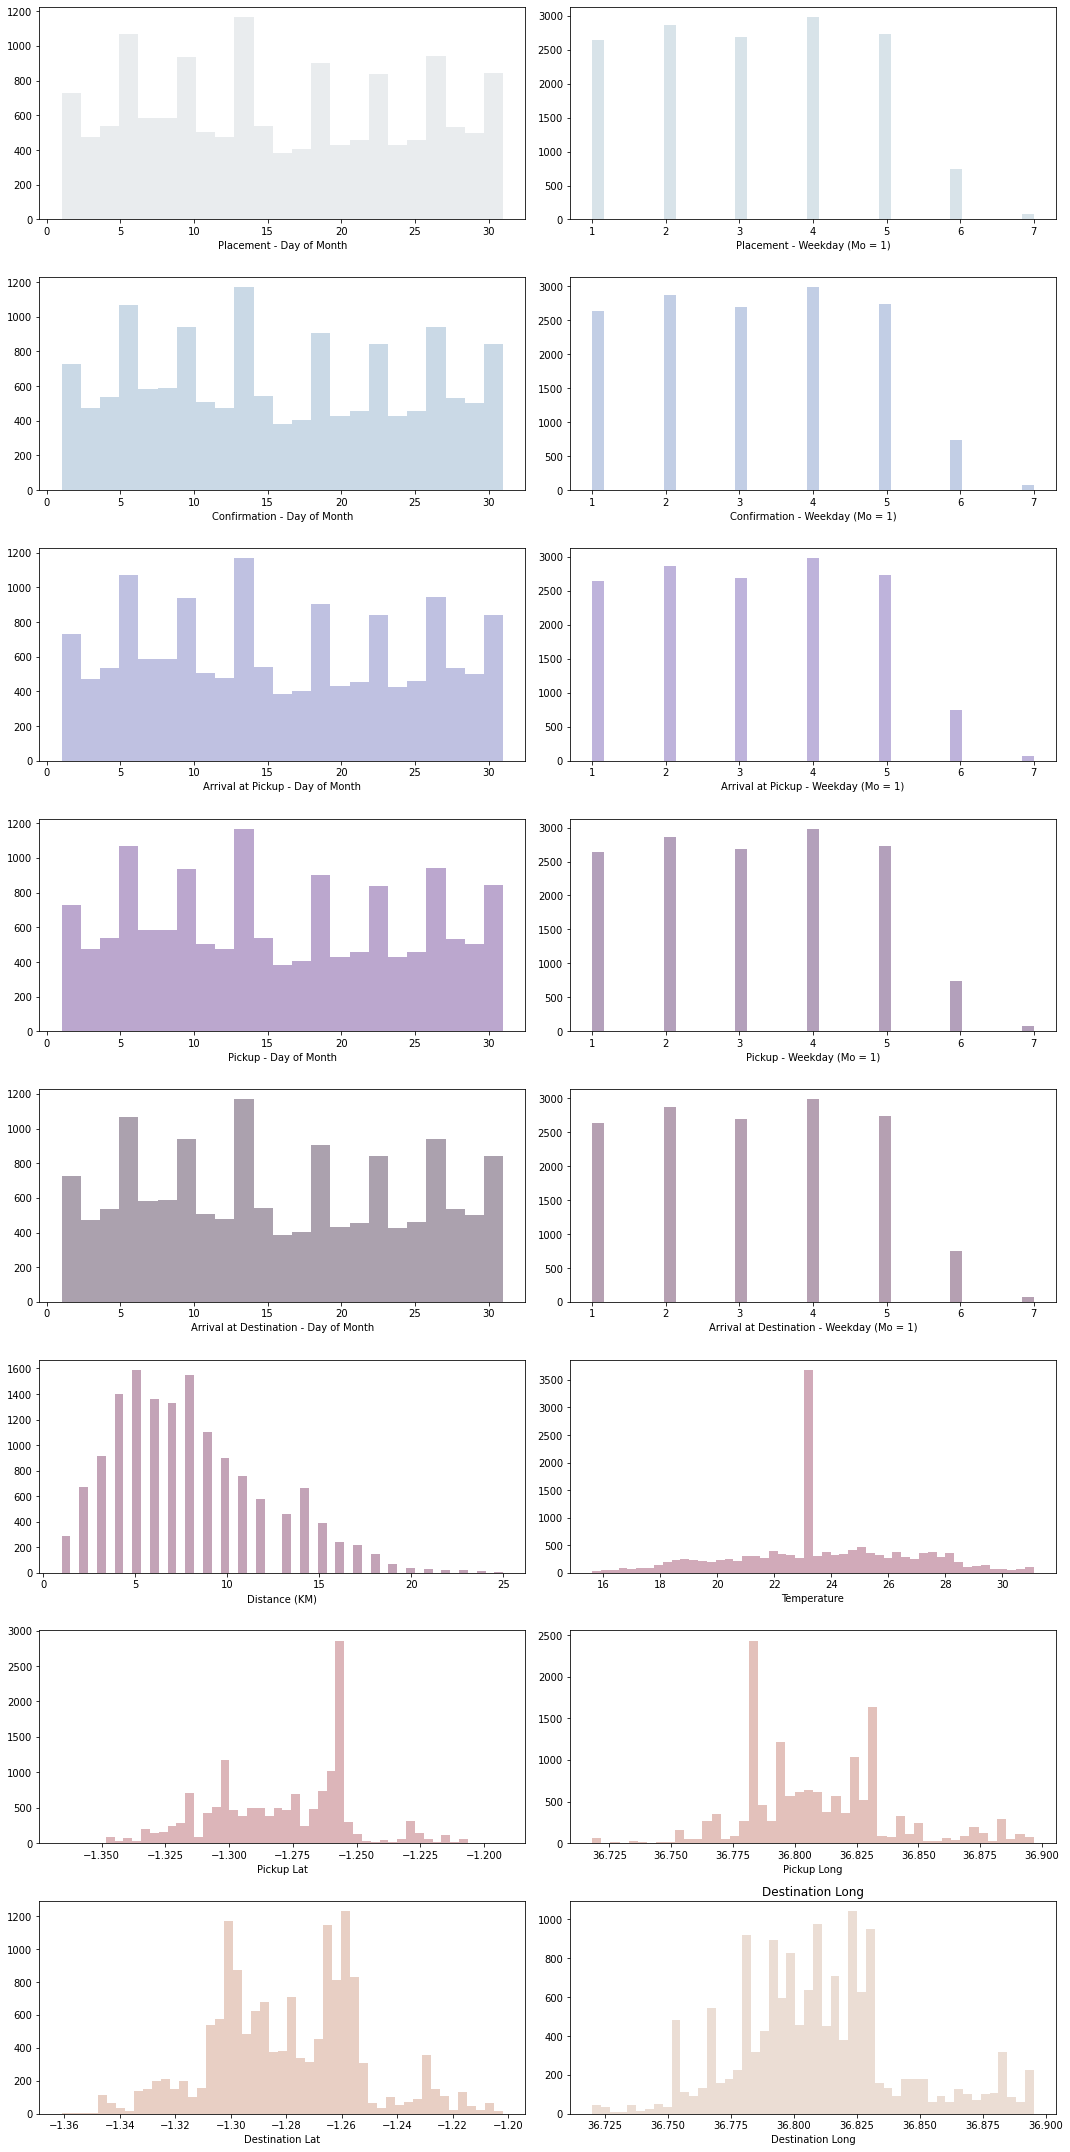

In [19]:
# plotting the histograms of the categorical variables
num_length = round(len(num_var) / 2)
colors = sns.color_palette("twilight", len(num_var))

fig, axes = plt.subplots(nrows = num_length, ncols = 2, figsize = (15, 30))

for var, color, ax in zip(num_var, colors, axes.flatten()):
    sns.distplot(df[var], ax = ax, color = color, kde = False, kde_kws = {'alpha' : 0.6})
    plt.title(var)
    
plt.tight_layout()

We note that services happen less often over the weekends than on the weekdays.

Majority of the deliveries cover distances ranging from 0 to 15 km.

There seems to be high activity on the days that are multiples of 5, e.g., 5th, 10th, 25th, etc. compared to the other days of the month. 

### 3.2 Bivariate Analysis

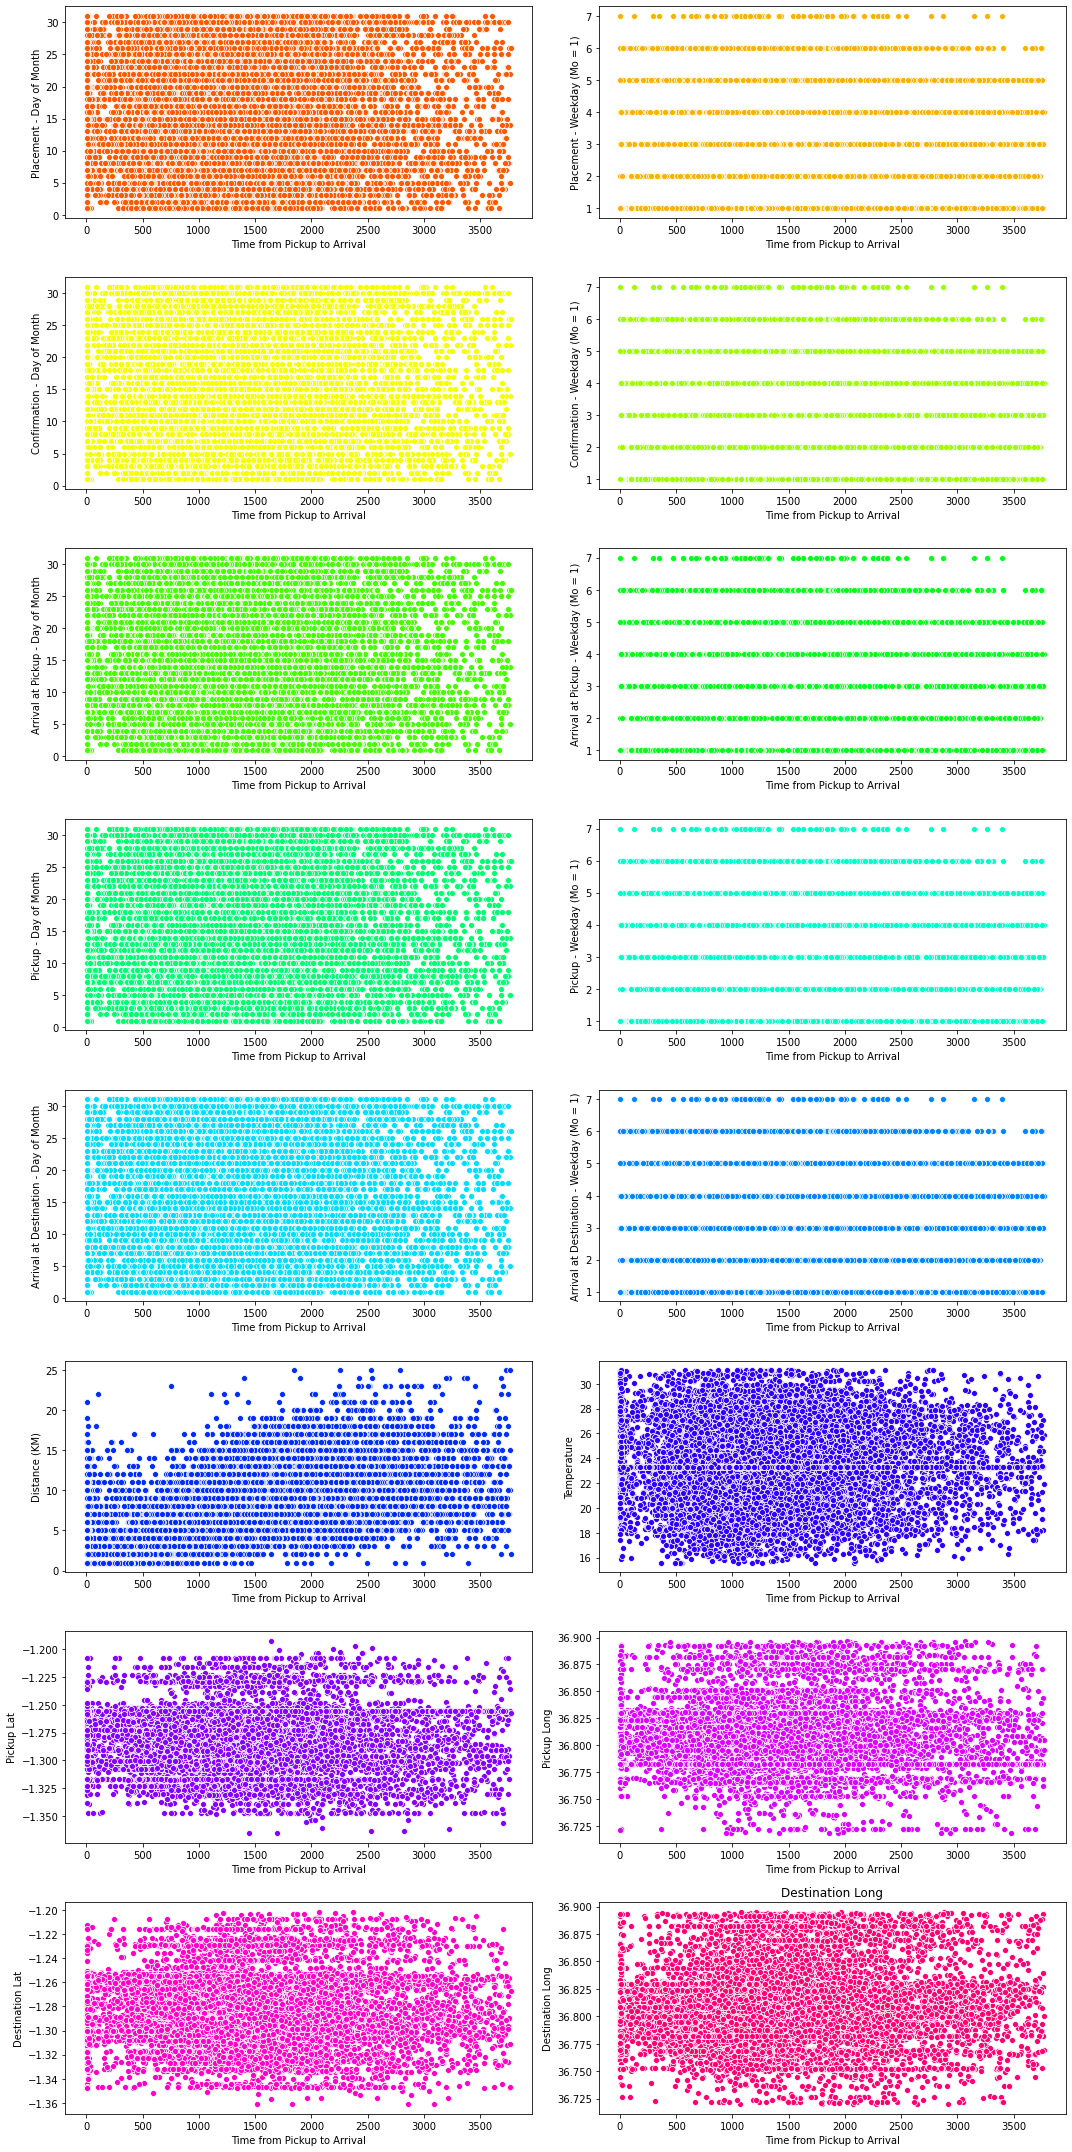

In [20]:
# previewing scatterplots of our numerical variable with our target variable
num_var.remove('Time from Pickup to Arrival')

num_length = round(len(num_var) / 2)
colors = sns.color_palette("hsv", len(num_var))

fig, axes = plt.subplots(nrows = num_length, ncols = 2, figsize = (15, 30))

for var, color, ax in zip(num_var, colors, axes.flatten()):
    sns.scatterplot(x = df['Time from Pickup to Arrival'], y = df[var], ax = ax, color = color)
    plt.title(var)
    
plt.tight_layout()

There does not seem to be a clear relationship between our target variable and the other variables.

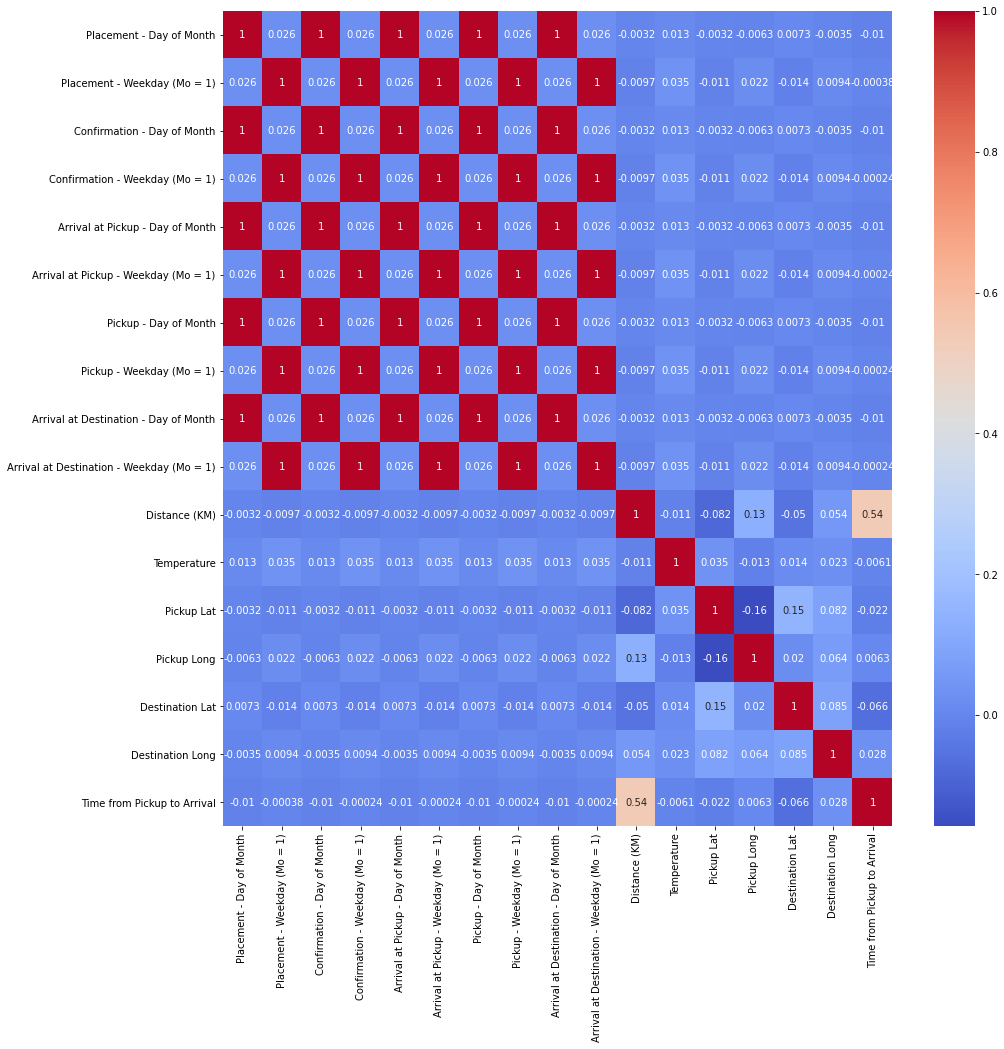

In [21]:
# visualizing the correlations between the variables
corr = df.corr()

plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

We see that the days and months are perfectly correlated with one another, and that Distance is moderately correlated with Time from Pickup to Arrival.

## 3.3 Feature Construction

In [22]:
# calculating the rider speed in km/h
df['Rider Speed (km/h)'] = df.apply(lambda x: x['Distance (KM)'] / (x['Time from Pickup to Arrival']/3600), axis=1)

# grouping by Rider Id and calculating the average rider speed
avg_rider_speed_df = pd.DataFrame(df.groupby('Rider Id')['Rider Speed (km/h)'].mean().reset_index().rename(columns={'Rider Speed (km/h)':'Avg Rider Speed (km/h)'}))

# adding the new column to our dataset
df = pd.merge(df, avg_rider_speed_df, on='Rider Id')

# previewing our modified dataset
df.head()

,Order No,User Id,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Rider Speed (km/h),Avg Rider Speed (km/h)
0,Order_No_4211,User_Id_633,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,19.328859,18.052692
1,Order_No_14170,User_Id_3339,Business,31,5,12:51:41,31,5,13:12:49,31,5,13:20:02,31,5,13:33:08,31,5,14:16:43,6,24.7,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,8.260038,18.052692
2,Order_No_118,User_Id_3688,Business,14,4,14:42:58,14,4,14:44:37,14,4,15:05:00,14,4,15:28:59,14,4,16:13:52,12,27.5,-1.255189,36.782203,-1.261323,36.865718,Rider_Id_432,2693,16.041589,18.052692
3,Order_No_10887,User_Id_2209,Business,16,3,16:28:49,16,3,16:40:48,16,3,17:07:46,16,3,17:10:35,16,3,17:52:02,10,19.9,-1.262691,36.782702,-1.309020,36.840914,Rider_Id_432,2487,14.475271,18.052692
4,Order_No_918,User_Id_1363,Business,28,1,16:03:31,28,1,16:07:45,28,1,16:26:42,28,1,16:35:55,28,1,16:44:42,3,22.4,-1.307787,36.844321,-1.309073,36.831526,Rider_Id_432,527,20.493359,18.052692


In [23]:
# calculating the pickup delay in seconds
from datetime import datetime, date
df['Pickup Delay (seconds)'] = df.apply(lambda x: (datetime.combine(date.today(), x['Pickup - Time']) - datetime.combine(date.today(), x['Confirmation - Time'])).total_seconds(), axis=1)

# grouping by Rider Id and calculating the average pickup delay
pickup_delay_df = pd.DataFrame(df.groupby('Rider Id')['Pickup Delay (seconds)'].mean().reset_index().rename(columns = {'Pickup Delay (seconds)': 'Avg Pickup Delay (seconds)'}))

# adding to our dataset
df = pd.merge(df, pickup_delay_df, on='Rider Id')

# previewing our modified dataset
df.head()

,Order No,User Id,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Rider Speed (km/h),Avg Rider Speed (km/h),Pickup Delay (seconds),Avg Pickup Delay (seconds)
0,Order_No_4211,User_Id_633,Business,9,5,09:35:46,9,5,09:40:10,9,5,10:04:47,9,5,10:27:30,9,5,10:39:55,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,19.328859,18.052692,2840.0,1754.133333
1,Order_No_14170,User_Id_3339,Business,31,5,12:51:41,31,5,13:12:49,31,5,13:20:02,31,5,13:33:08,31,5,14:16:43,6,24.7,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,8.260038,18.052692,1219.0,1754.133333
2,Order_No_118,User_Id_3688,Business,14,4,14:42:58,14,4,14:44:37,14,4,15:05:00,14,4,15:28:59,14,4,16:13:52,12,27.5,-1.255189,36.782203,-1.261323,36.865718,Rider_Id_432,2693,16.041589,18.052692,2662.0,1754.133333
3,Order_No_10887,User_Id_2209,Business,16,3,16:28:49,16,3,16:40:48,16,3,17:07:46,16,3,17:10:35,16,3,17:52:02,10,19.9,-1.262691,36.782702,-1.309020,36.840914,Rider_Id_432,2487,14.475271,18.052692,1787.0,1754.133333
4,Order_No_918,User_Id_1363,Business,28,1,16:03:31,28,1,16:07:45,28,1,16:26:42,28,1,16:35:55,28,1,16:44:42,3,22.4,-1.307787,36.844321,-1.309073,36.831526,Rider_Id_432,527,20.493359,18.052692,1690.0,1754.133333


In [24]:
df.dtypes

Order No                                      object
User Id                                       object
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)      int64
Arrival at Destination - Time                 object
Distance (KM)                                 

# <font color='#2F4F4F'>4. Data Modeling</font>

In [25]:
# encoding our categorical variables
#YOUR CODE HERE
df['Order No'] = df['Order No'].str.replace(r'\D', '').astype(int)
df['User Id'] = df['User Id'].str.replace(r'\D', '').astype(int)
df['Rider Id'] = df['Rider Id'].str.replace(r'\D', '').astype(int)
df['Personal or Business'] = df['Personal or Business'].replace({'Personal' : '0', 'Business' : '1'}).astype(int)
df.sample(3)

,Order No,User Id,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,Rider Speed (km/h),Avg Rider Speed (km/h),Pickup Delay (seconds),Avg Pickup Delay (seconds)
870,15966,3184,1,9,5,09:59:07,9,5,09:59:22,9,5,10:21:34,9,5,10:24:45,9,5,10:53:19,13,20.100000,-1.309037,36.880424,-1.339626,36.886313,237,1714,27.304551,24.033172,1523.0,1522.174603
13109,16830,2200,1,29,1,12:30:51,29,1,12:36:12,29,1,12:51:12,29,1,13:16:31,29,1,13:28:46,5,23.258889,-1.290894,36.822971,-1.254516,36.824372,336,735,24.489796,26.143707,2419.0,1522.645161
11893,14743,3331,1,19,4,10:29:55,19,4,10:53:59,19,4,10:57:09,19,4,11:00:36,19,4,11:48:43,18,20.400000,-1.255189,36.782203,-1.353683,36.761156,147,2887,22.445445,21.968589,397.0,1152.434783


In [26]:
cat_var = df.select_dtypes(include = ['object']).columns.to_list()
df.drop(columns = cat_var, inplace = True)

In [27]:
df.columns

Index(['Order No', 'User Id', 'Personal or Business',
       'Placement - Day of Month', 'Placement - Weekday (Mo = 1)',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month',
       'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)', 'Distance (KM)',
       'Temperature', 'Pickup Lat', 'Pickup Long', 'Destination Lat',
       'Destination Long', 'Rider Id', 'Time from Pickup to Arrival',
       'Rider Speed (km/h)', 'Avg Rider Speed (km/h)',
       'Pickup Delay (seconds)', 'Avg Pickup Delay (seconds)'],
      dtype='object')

In [28]:
# split into features (X) and label (Y) while removing categorical variables
X = df.iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24]].values  
y = df.iloc[:, 20].values

In [29]:
# split into 70-30 train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

In [30]:
# standardizing our features
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

## 4.1 Principal Component Analysis

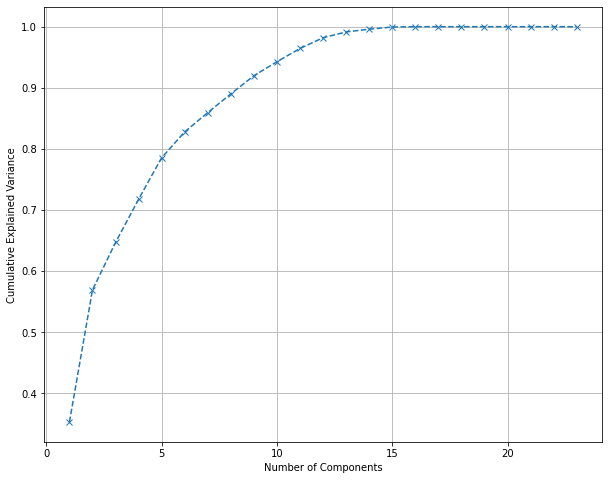

In [31]:
# fitting PCA to our data 
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)
pca.fit(X_train)

# getting the explained variance ratio
evr = pca.explained_variance_ratio_
range_length = len(evr) + 1

# plotting the explained variance ratio so we can determine how any principal components to keep
plt.figure(figsize = (10, 8))
plt.plot(range(1, range_length), evr.cumsum(), marker = 'x', linestyle = '--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

We see that we capture at least 80% of the variance when the number of components is 8.

In [32]:
# fitting PCA with 8 components onto our features and transforming them
from sklearn.decomposition import PCA
pca = PCA(random_state = 0,n_components=8)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [34]:
# loading some regressors
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  

# setting up the regressors
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

# fitting our regressors to our training data
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# making predictions
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

from sklearn import metrics
from sklearn.metrics import r2_score
# evaluating RMSE and R2 scores
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

print('SVM R2:', r2_score(y_test, svm_y_pred))
print('KNN R2:', r2_score(y_test, knn_y_pred))
print('Decision Tree R1:', r2_score(y_test, dec_y_pred))

SVM RMSE: 682.2222387033812
KNN RMSE: 726.1048718187559
Decision Tree RMSE: 46.36887333733086
SVM R2: 0.2386700248362953
KNN R2: 0.13757788176185004
Decision Tree R1: 0.9964829845831059


In [35]:
# 10% of the mean of the target variable
.1 * y_test.mean()

131.78121747001586

What can you note about the relationship between the RMSE values and 10% of the target variable's mean?

## 4.2 Step Forward Feature Selection

### <font color='red'><strong>WARNING:</strong> This method is computationally expensive.</font>

In [36]:
# using Sequential Feature Selector with forward = True
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# setting up the regressors
dec_regressor = DecisionTreeRegressor(random_state=27)

# setting the selector on all regressors with k_features = 5 and cv = 5
from mlxtend.feature_selection import SequentialFeatureSelector
feature_selector = SequentialFeatureSelector(dec_regressor,
           k_features=5,
           forward=True,
           verbose=2,
           scoring='r2',
           cv=5)

# fitting the selectors to the training data
feature_selector = feature_selector.fit(X_train, y_train)

# getting the features suggested by the selectors
feat_cols = list(feature_selector.k_feature_idx_)
print(feat_cols)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished

[2020-08-09 17:22:23] Features: 1/5 -- score: 0.3078708438932428[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.2s finished

[2020-08-09 17:22:24] Features

[2, 7, 9, 12, 19]


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.9s finished

[2020-08-09 17:22:32] Features: 5/5 -- score: 0.9976716551750913

In [37]:
# without step forward feature selection
# load regressors
dec_regressor = DecisionTreeRegressor(random_state=27)
dec_regressor.fit(X_train, y_train)


# making predictions
y_test_pred = dec_regressor.predict(X_test)

In [39]:
# with step forward feature selection
# load regressors
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)

# setting our features using the provided lists while removing the 'Placement - Time' variable 
# present in the lists
dec_regressor2 = DecisionTreeRegressor(random_state=27)
dec_regressor2.fit(X_train[:, feat_cols], y_train)
y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])

In [40]:
# evaluating RMSE and R2 of both the normal regressors and the sfs regressors
y_test_pred = dec_regressor.predict(X_test)
print('Decision Tree RMSE Without sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Decision Tree R2:', r2_score(y_test, y_test_pred))

y_test_pred2 = dec_regressor2.predict(X_test[:, feat_cols])
print('Decision Tree RMSE with sffs:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))
print('Decision Tree R2:', r2_score(y_test, y_test_pred2))

Decision Tree RMSE Without sffs: 46.36887333733086
Decision Tree R2: 0.9964829845831059
Decision Tree RMSE with sffs: 23.42045852129749
Decision Tree R2: 0.9991027530896177


What do you note about teh RMSE and R2 scores?

## 4.3 Recursive Feature Elimination

In [47]:
from sklearn.feature_selection import RFE

# splitting into 70-30 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

# scaling our features
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# loading our regressors
svm_regressor = SVR(kernel="linear")   
dec_regressor = DecisionTreeRegressor(random_state=27)

# setting up RFE with 5 features to select
from sklearn.feature_selection import RFE
svm_regressor = RFE(svm_regressor, n_features_to_select = 5, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 5, step=1)

# fitting to our training data
svm_regressor.fit(X_train, y_train) 
dec_regressor.fit(X_train, y_train)

# making predictions
# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test) 
dec_y_pred = dec_regressor.predict(X_test)

# evaluating RMSE and R2 scores
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))) 
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
 
# Displaying our best features

print(svm_regressor.support_)
print( dec_regressor.support_)

SVM RMSE: 724.7292655595658
Decision Tree RMSE: 36.77146352175241
[False False False False False False False False False False False False
  True False  True False  True False False  True  True False False]
[False  True False False False False False False False False False False
  True False False False  True False False  True False False  True]


What are your results?

# <font color='#2F4F4F'>5. Summary of Findings</font>

Report your findings.

# <font color='#2F4F4F'>6. Recommendations</font>

Provide recommendations.

# <font color='#2F4F4F'>7. Challenging your Solution</font>

### a) Did we have the right question?


### b) Did we have the right data?


### c) What can be done to improve the solution?
